# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
fitbit = pd.read_csv("../data/Fitbit2.csv")
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [12]:
# AVERAGE STEPS BY MONTH_ENCODED
pd.DataFrame(fitbit.groupby(["Months_encoded"])["Steps"].mean())

,Steps
Months_encoded,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774
6,12536.166667
7,9193.322581
8,11584.774194
9,9191.333333


In [13]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
pd.DataFrame(fitbit.groupby(["Work_or_Weekend"])["Steps"].mean())

,Steps
Work_or_Weekend,
0,10064.238095
1,10144.572519


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

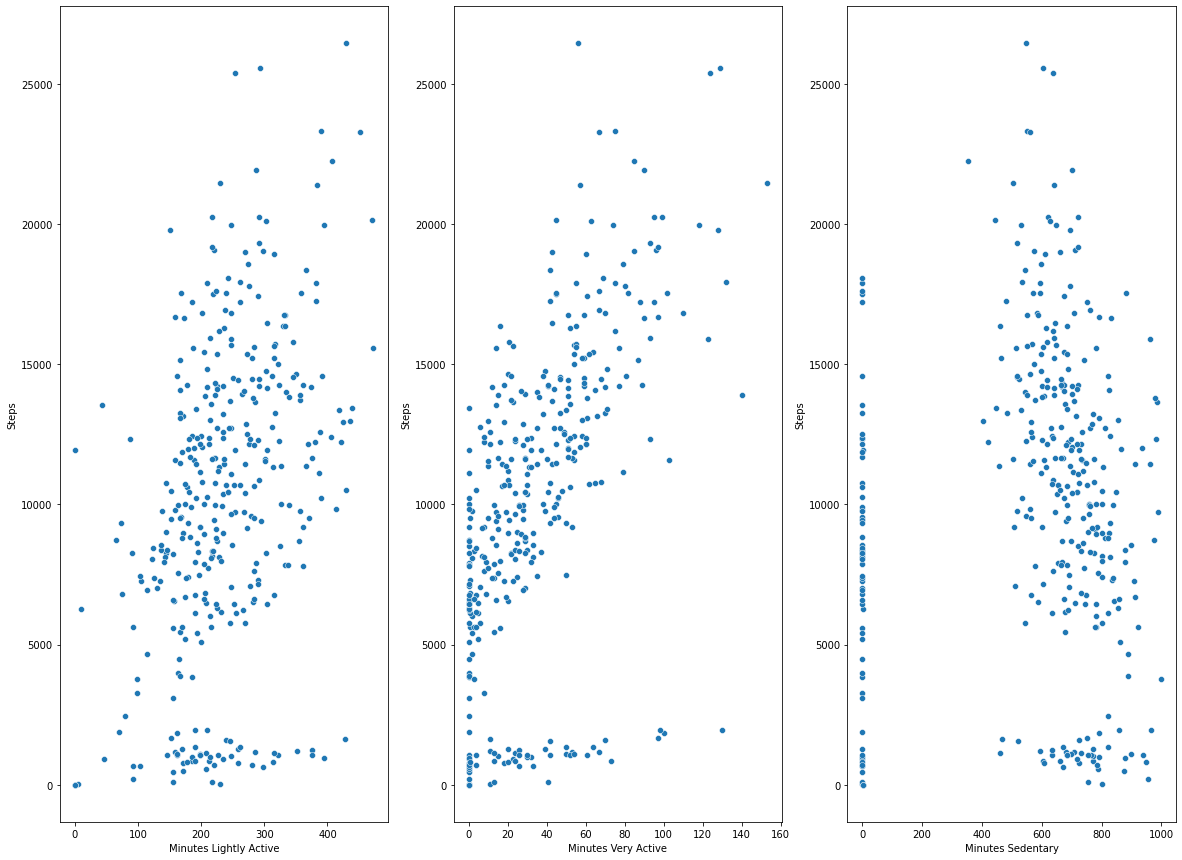

In [23]:
mins_lst = ("Minutes Lightly Active","Minutes Very Active","Minutes Sedentary")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))

for i in range(3):
    sns.scatterplot(x=mins_lst[i], y="Steps", data=fitbit, vmin=0, ax=axs[i])



## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [5]:
titanic= pd.read_csv("../data/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [20]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [22]:
titanic.select_dtypes(include="int64")

,survived,pclass,sibsp,parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0
...,...,...,...,...
886,0,2,0,0
887,1,1,0,0
888,0,3,1,2
889,1,1,0,0


In [23]:
titanic.select_dtypes(include="category")

,class,deck
0,Third,NaN
1,First,C
2,Third,NaN
3,First,C
4,Third,NaN
...,...,...
886,Second,NaN
887,First,B
888,Third,NaN
889,First,C


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [26]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [56]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
plt.style.use("classic")

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

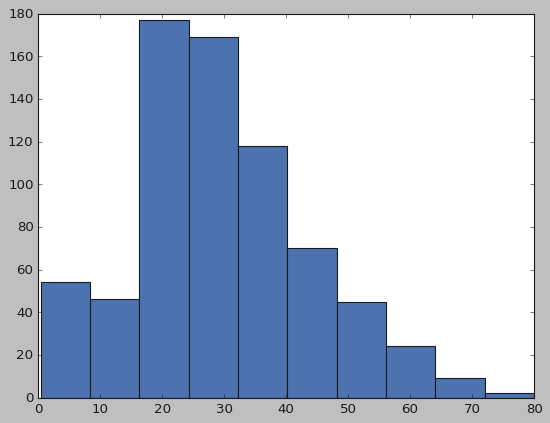

In [57]:
plt.hist(x=titanic.age)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

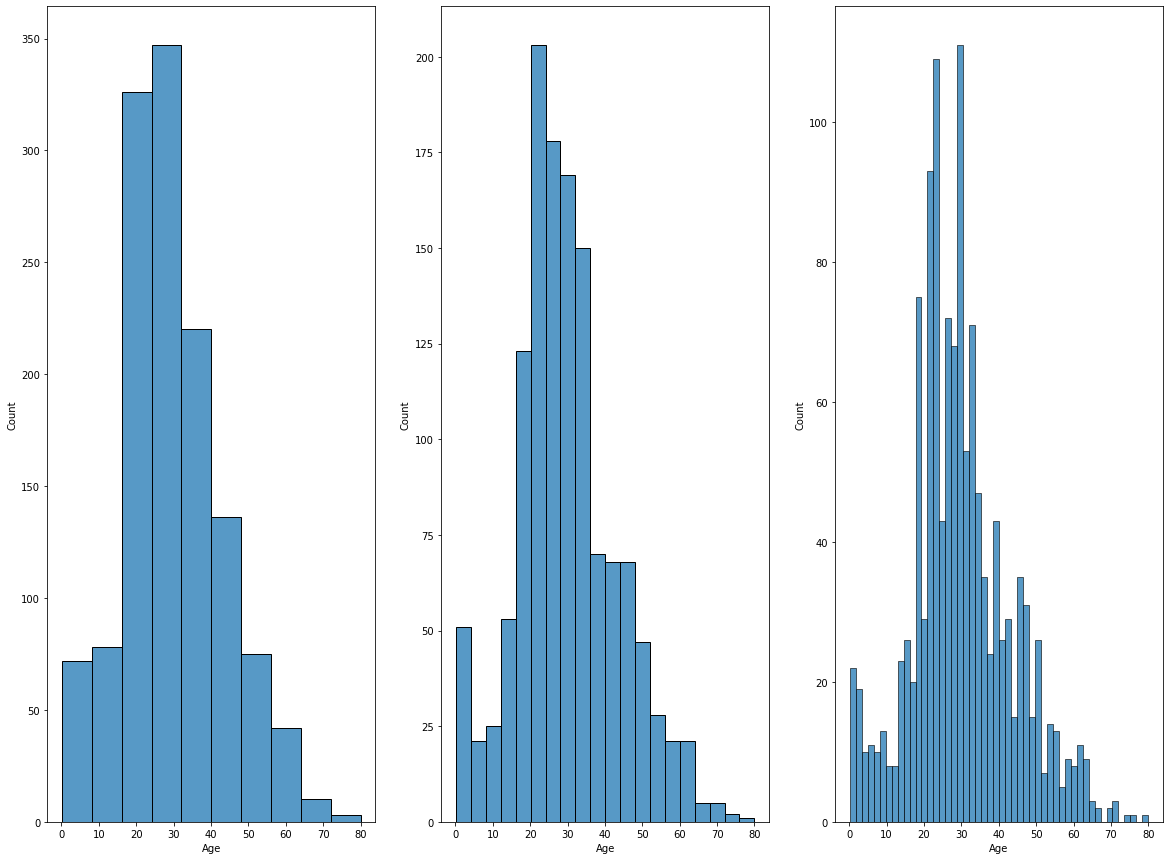

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))
sns.histplot(data=titanic, x="Age", bins=10, ax=axs[0])
sns.histplot(data=titanic, x="Age", bins=20, ax=axs[1])
sns.histplot(data=titanic, x="Age", bins=50, ax=axs[2])

#### How does the bin size affect your plot?

In [ ]:
"""
Los datos estarán más distribuidos cuantas más bins haya
"""

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='age', ylabel='Density'>

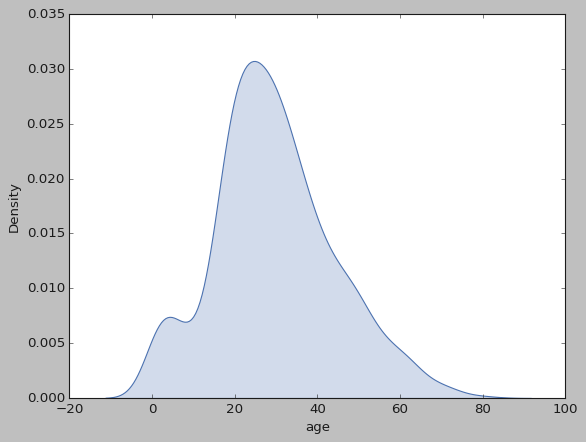

In [93]:
sns.kdeplot(x=titanic.age, fill=True)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

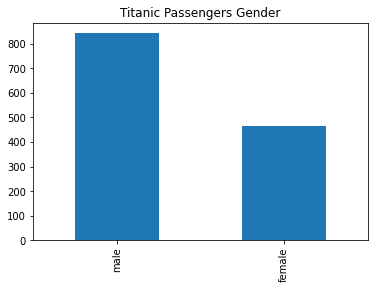

In [18]:
# Method 1 - matplotlib
titanic['Gender'].value_counts().plot(kind = 'bar', title = 'Titanic Passengers Gender');

<AxesSubplot:xlabel='Gender', ylabel='count'>

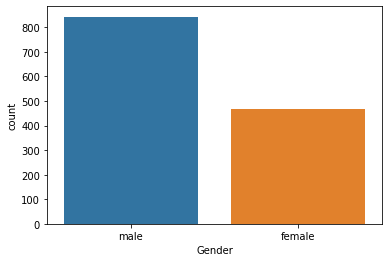

In [19]:
# Method 2 - seaborn
sns.countplot(x='Gender', data=titanic)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

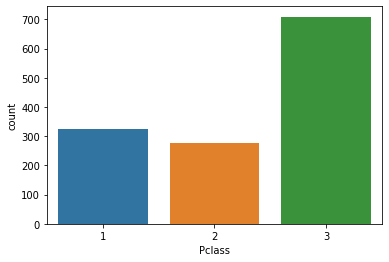

In [20]:
sns.countplot(x='Pclass', data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

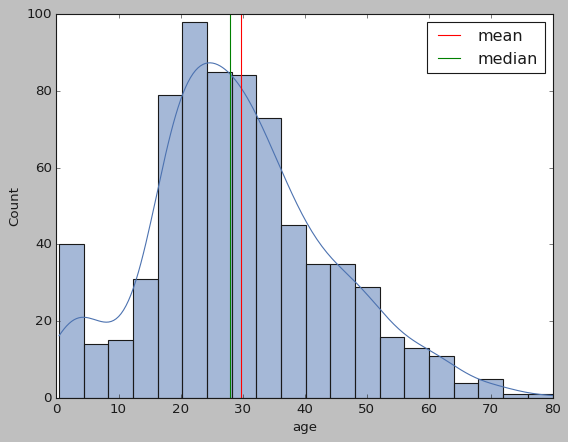

In [91]:
graf = sns.histplot(x=titanic.age, kde=True)
graf.axvline(x=titanic.age.dropna().mean(), c="red", label="mean")
graf.axvline(x=titanic.age.dropna().median(), c="green", label="median")
plt.legend()

In [ ]:
"""
Con el histograma podemos ver la distribución muy clara además de poder añadirle el kde y algunas medidas como la media y la mediana
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Concentración de datos entre 15 y 40 años, media=30
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

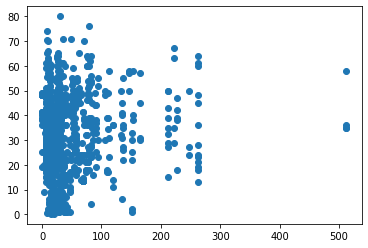

In [14]:
# Method 1 - matplotlib
plt.scatter(titanic['Fare'], titanic['Age'])

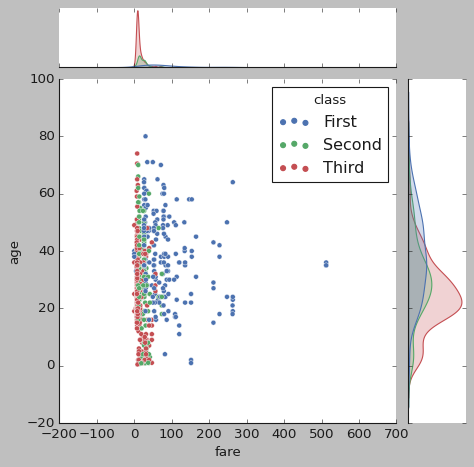

In [95]:
# Method 2 - seaborn
sns.jointplot(data=titanic, x= "fare", y= "age", hue="class")

#### Plot the correlation matrix using seaborn.

In [15]:
corr_mat = titanic.corr()
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


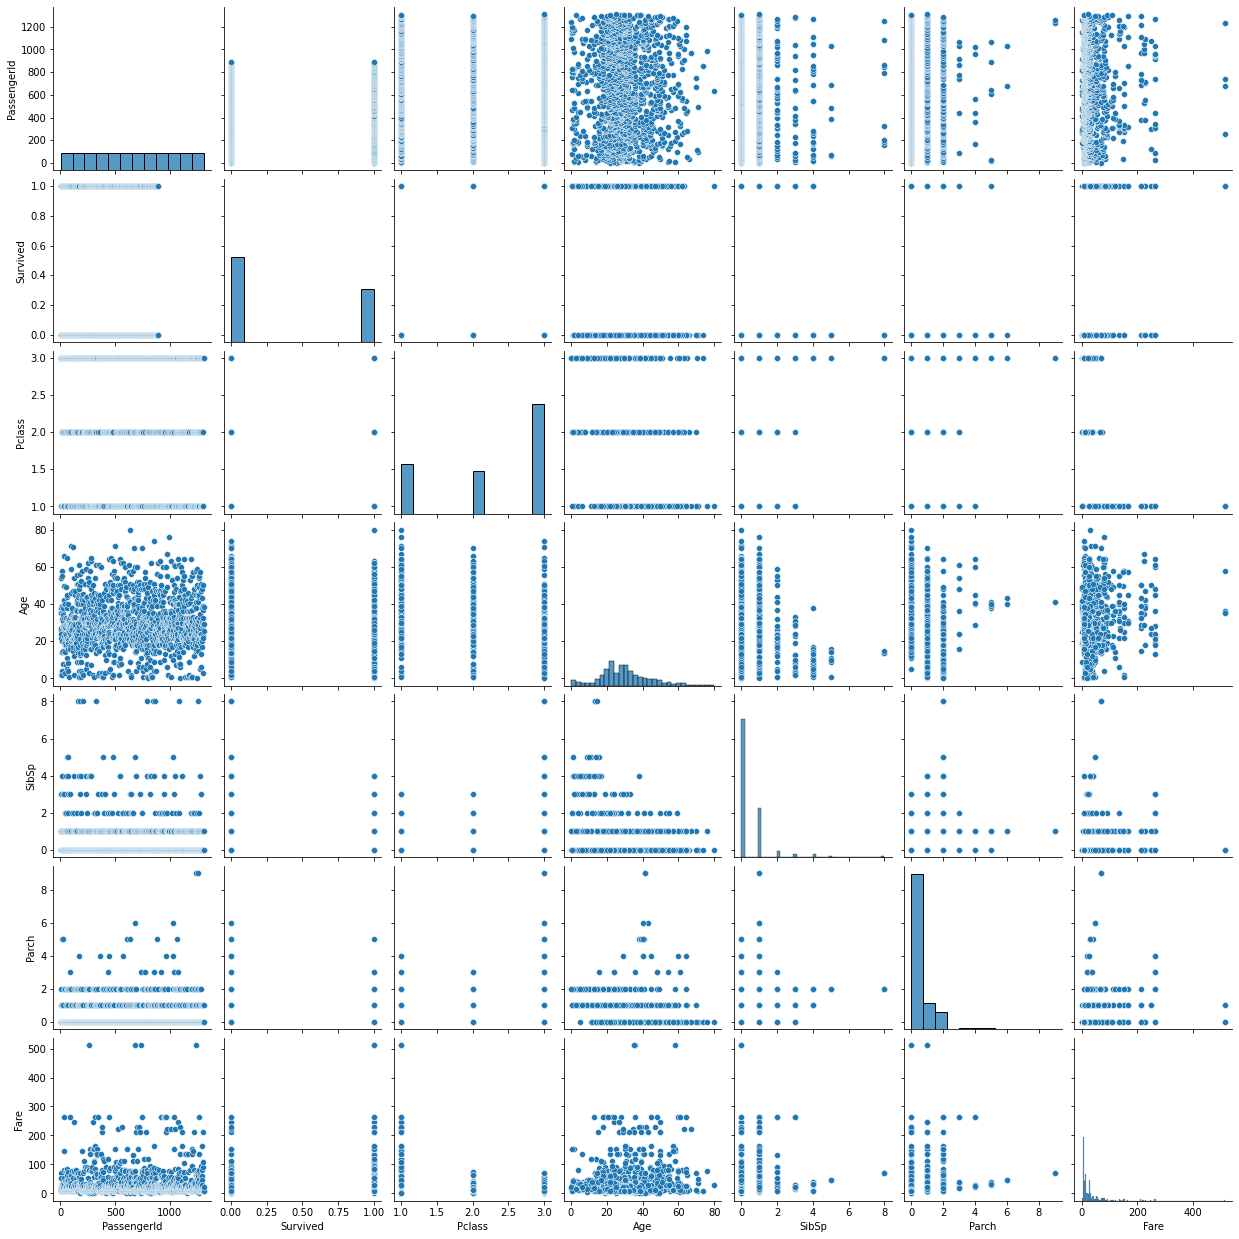

In [16]:
sns.pairplot(titanic)

#### What are the most correlated features?

In [ ]:
"""
The most correlated variables are Fare and Pclass
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

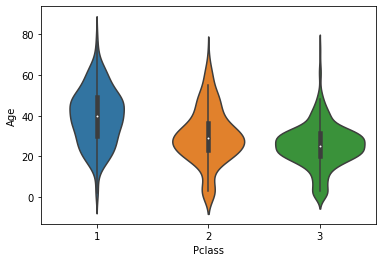

In [9]:
sns.violinplot(x=titanic.Pclass, y=titanic.Age);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here